# Imports

In [95]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector, Pauli, SparsePauliOp, Operator
from qiskit.circuit.library import UnitaryGate
from qiskit.circuit import ParameterVector
from qiskit_aer import AerSimulator

# from qiskit_ibm_runtime import QiskitRuntimeService, Session, EstimatorV2 as Estimator, SamplerV2 as Sampler
from qiskit.primitives import BackendEstimator as Estimator, Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


import numpy as np
from scipy.optimize import minimize
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [3]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token="65630c8d92d16c3cc76c4392aac0841e1a5e0caca2436115b2c239cc9f5c8a17608e0974bdc3e41be422e5c63c705d3474f5674a748d059f87972e0a22886e8f", overwrite=True, set_as_default=True)

# Ansatz 

## Ansatz gates 

In [6]:
# Y - Cx Ansatz
def ansatz_cx_1(theta, qc):
    n = qc.num_qubits
    qc.h(np.arange(n))

    # Apply Ry rotations based on the parameters
    for qubit in range(n):
        qc.ry(theta[qubit], qubit)

    # Add controlled gates (CNOTs)
    for i in range(n):
        qc.cx(i, (i+1)%n)
    return qc
    
def ansatz_cx_2(theta, qc):
    n = qc.num_qubits
    qc.h(np.arange(n))

    # Apply Ry rotations based on the parameters
    for qubit in range(n):
        qc.ry(theta[qubit], qubit)

    # Add controlled gates (CNOTs)
    for i in range(n):
        if(i < n - 1):
            qc.cx(i, (i+1)%n)
    return qc

In [7]:
# Y - Cy Ansatz
def ansatz_cy_1(theta, qc):
    n = qc.num_qubits
    qc.h(np.arange(n))

    # Apply Ry rotations based on the parameters
    for qubit in range(n):
        qc.ry(theta[qubit], qubit)

    # Add controlled gates (CNOTs)
    for i in range(n):
        qc.cy(i, (i+1)%n)
    return qc
    
def ansatz_cy_2(theta, qc):
    n = qc.num_qubits
    qc.h(np.arange(n))

    # Apply Ry rotations based on the parameters
    for qubit in range(n):
        qc.ry(theta[qubit], qubit)

    # Add controlled gates (CNOTs)
    for i in range(n):
        if(i < n - 1):
            qc.cy(i, (i+1)%n)
    return qc

In [8]:
# Y - Cz Ansatz
def ansatz_cz_1(theta, qc):
    n = qc.num_qubits
    qc.h(np.arange(n))

    theta =  ParameterVector('θ', 10)
    print(theta)
    # Apply Ry rotations based on the parameters
    for qubit in range(n):
        qc.ry(theta[qubit], qubit)

    # Add controlled gates (CNOTs)
    for i in range(n):
        qc.cz(i, (i+1)%n)


    print(qc.parameters)
    return qc
    
def ansatz_cz_2(theta, qc):
    n = qc.num_qubits
    qc.h(np.arange(n))

    # Apply Ry rotations based on the parameters
    for qubit in range(n):
        qc.ry(theta[qubit], qubit)

    # Add controlled gates (CNOTs)
    for i in range(n):
        if(i < n - 1):
            qc.cz(i, (i+1)%n)
    return qc

## Ansatz Gate

θ, ['θ[0]', 'θ[1]', 'θ[2]', 'θ[3]', 'θ[4]', 'θ[5]', 'θ[6]', 'θ[7]', 'θ[8]', 'θ[9]']
ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9])])


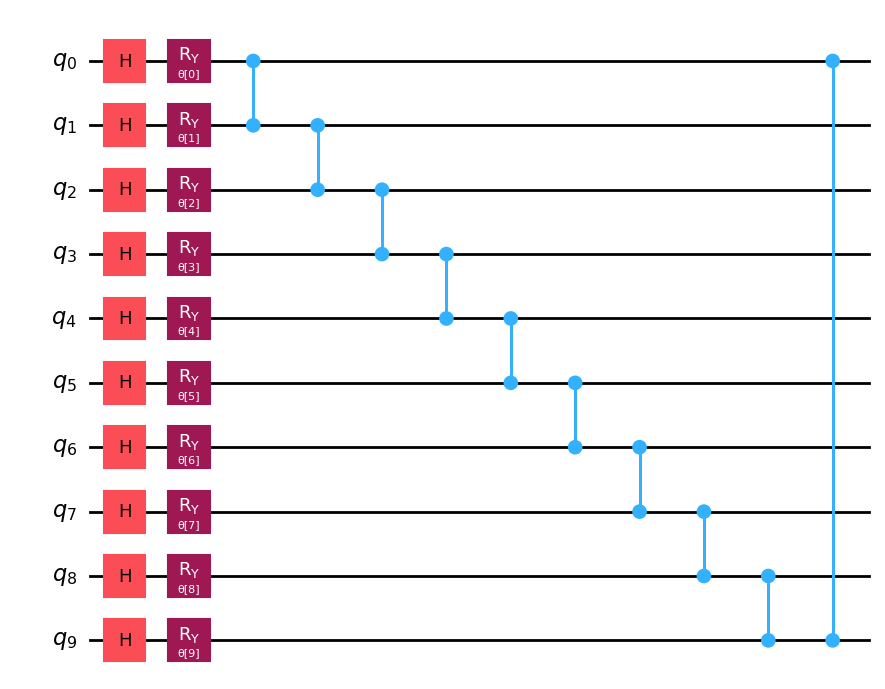

In [71]:
initial_params = []
for i in range(num_qubits):
    initial_params.append(i * 30)
    
def generate_ansatz_gate(params):
    num_qubits = 10
    
    qc_temp = QuantumCircuit(num_qubits)
    ansatz_circuit = ansatz_cz_1(params, qc_temp)
    display(ansatz_circuit.draw('mpl'))
    
    ansatz_circuit.remove_final_measurements()  # Remove any final measurements (optional)
    ansatz_circuit.data = [instr for instr in ansatz_circuit.data if instr.operation.name != "barrier"]
    
    ansatz_gate = ansatz_circuit.to_gate(label='Ansatz')

    return ansatz_gate

ansatz_gate = generate_ansatz_gate(initial_params)

# Symmetric Cryptography Functions

## Key generation Permutations

In [13]:
def generate_p10_circuit():
    qc = QuantumCircuit(10, name="P10")
    n = qc.num_qubits
    qc.swap(0, 2)
    qc.swap(1, 4)
    qc.swap(2, 4)
    qc.swap(3, 6)
    qc.swap(4, 6)
    qc.swap(5, 9)
    qc.swap(7, 8)
    return qc

def generate_ls1_circuit():
    qc = QuantumCircuit(5, name="LS-1")
    n = qc.num_qubits
    for i in range(4):
        qc.swap(i, i+1)
    return qc

def generate_ls2_circuit():
    qc = QuantumCircuit(5, name="LS-2")
    n = qc.num_qubits
    
    qc.swap(0, 2)
    qc.swap(1, 3)
    qc.swap(2, 4)
    qc.swap(3, 4)
    return qc

def generate_p8_circuit():
    qc = QuantumCircuit(8, name="P8")
    n = qc.num_qubits
    
    qc.swap(0, 5)
    qc.swap(1, 2)
    qc.swap(2, 6)
    qc.swap(3, 1)
    qc.swap(4, 7)
    qc.swap(5, 4)
    qc.swap(6, 3)
    qc.swap(7, 0)
    return qc



## Plaintext cipher

In [15]:
def generate_ip_circuit():
    qc = QuantumCircuit(8, name="IP")
    n = qc.num_qubits
    
    qc.swap(0, 1)
    qc.swap(1, 5)
    qc.swap(3, 5)
    qc.swap(4, 7)
    qc.swap(4, 5)
    qc.swap(6, 7)
    return qc

def generate_ip_inv_circuit():
    qc = QuantumCircuit(8, name="IP^-1")
    n = qc.num_qubits
    
    qc.swap(0, 3)
    qc.swap(1, 3)
    qc.swap(3, 4)
    qc.swap(4, 6)
    qc.swap(5, 6)
    qc.swap(6, 7)
    return qc

def generate_ep_circuit():
    qc = QuantumCircuit(8, name="E/P")
    n = qc.num_qubits

    qc.cx(0,7)
    qc.cx(1,4)
    qc.cx(2,5)
    qc.cx(3,6)
    # qc.cx(4,7)

    qc.swap(0,3)
    qc.swap(1,2)
    qc.swap(1,3)
    return qc


def generate_p4_circuit():
    qc = QuantumCircuit(4, name="P4")
    n = qc.num_qubits
    
    qc.swap(0, 2)
    qc.swap(1, 3)
    qc.swap(0, 3)
    qc.swap(2, 3)
    return qc


#  S-BOX Implementation

def generate_s0_circuit():
    qc = QuantumCircuit(6, name="S0")
    
    states = ["0000", "0001", "0010", "0011", "0100", "0101", "0110", "0111", "1000", "1001", "1010", "1011", "1100", "1101", "1110", "1111"]
    cx = [[5], [4, 5], [], [4], [4, 5], [5], [4], [], [4, 5], [4, 5], [4], [5], [5], [4, 5], [], [4]]
    
    for j,state in enumerate(states):
        for i, bit in enumerate(state):
            if(bit == '0'):
                qc.x(i)

        if(len(cx[j]) > 0):
            for t in cx[j]:
                qc.mcx([0, 1, 2, 3], t)
            
        
        for i, bit in enumerate(state):
            if(bit == '0'):
                qc.x(i)
    return qc
    
def generate_s1_circuit():
    qc = QuantumCircuit(6, name="S1")
    
    states = ["0000", "0001", "0010", "0011", "0100", "0101", "0110", "0111", "1000", "1001", "1010", "1011", "1100", "1101", "1110", "1111"]
    cx = [[], [4], [5], [], [4], [5], [4, 5], [4, 5], [4, 5], [4], [], [5], [5], [], [], [4, 5]]
    
    for j,state in enumerate(states):
        for i, bit in enumerate(state):
            if(bit == '0'):
                qc.x(i)

        if(len(cx[j]) > 0):
            for t in cx[j]:
                qc.mcx([0, 1, 2, 3], t)
            
        
        for i, bit in enumerate(state):
            if(bit == '0'):
                qc.x(i)
    return qc

def generate_s_box_gate():
    s0_circ = generate_s0_circuit()
    s1_circ = generate_s1_circuit()

    qc = QuantumCircuit(12)

    qc.compose(s0_circ, [0, 1, 2, 3, 8, 9], inplace=True)
    qc.compose(s1_circ, [4, 5, 6, 7, 10, 11], inplace=True)

    qc_gate = qc.to_gate(label='S-Box')
    return qc_gate


## Other gates and helper functions

In [17]:
def copy_circ(params, num_qubits):
    qc = QuantumCircuit(num_qubits)
    for i, j in params:
        qc.cx(i, j)
    return qc

def swap_gates():
    qc = QuantumCircuit(8)

    qc.swap(0, 4)
    qc.swap(1, 5)
    qc.swap(2, 6)
    qc.swap(3, 7)

    qc = qc.to_gate(label='SWAP')

    return qc

def getIntFromBinary(nums):
    n = len(nums)
    out = 0
    count = 0
    for bit in nums:
        if(bit == 1):
            out += pow(2,n - count - 1)
        count+=1
    return out

## Generate circuits

In [19]:
p10_circuit = generate_p10_circuit()
ls1_circuit = generate_ls1_circuit()
ls2_circuit = generate_ls2_circuit()
p8_circuit = generate_p8_circuit()
p4_circuit = generate_p4_circuit()

ip_circuit = generate_ip_circuit()
ip_inv_circuit = generate_ip_inv_circuit()
ep_circuit = generate_ep_circuit()
p4_circuit = generate_p4_circuit()

s0_circuit = generate_s0_circuit()
s1_circuit = generate_s1_circuit()

## Create gates for each

In [21]:
p10_gate = p10_circuit.to_gate(label='P10')
ls1_gate = ls1_circuit.to_gate(label='LS-1')
ls2_gate = ls2_circuit.to_gate(label='LS-2')
p8_gate = p8_circuit.to_gate(label='P8')
p4_gate= p4_circuit.to_gate(label='P4')

ip_gate = ip_circuit.to_gate(label='IP')
ip_inv_gate = ip_inv_circuit.to_gate(label='IP^-1')
ep_gate = ep_circuit.to_gate(label='E/P')

s0_gate = s0_circuit.to_gate(label='S0')
s1_gate = s1_circuit.to_gate(label='S1')

# Hamiltonian Preparation

In [23]:
ciphertext = [0, 1, 1, 1, 0, 1, 1, 1]
cipherNum = getIntFromBinary(ciphertext)

# sample_ciphertexts = [ [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0, 0], [0, 1, 1, 0, 1, 0, 1, 1], [1, 0, 0, 1, 0, 1, 0, 0]]

# Graph edges
edges = [
    (0, 1), (0, 2), (0, 3),
    (1, 4), (1, 5), (1, 0),
    (2, 6), (2, 7), (2, 0),
    (3, 5), (3, 6), (3, 0),
    (4, 5), (4, 1), (4, 7),
    (5, 3), (5, 4), (5, 1),
    (6, 2), (6, 3), (6, 7),
    (7, 2), (7, 4), (7, 6)
]

# Hamiltonian
hamiltonian_terms = []

# pairwise z gates from graph
n = len(ciphertext)
for i, j in edges:
    zstring = ""

    for i in range(10):
        zstring += 'I'

    
    for k in np.arange(7,-1, -1):
        if(k == i or k == j):
            zstring += 'Z'
        else:
            zstring += 'I'
    
    for i in range(12):
        zstring += 'I'    
    
    if ciphertext[n - i - 1] != ciphertext[n - j - 1]:
        hamiltonian_terms.append((1.0, Pauli(zstring))) # w_ij = +1
    else:
        hamiltonian_terms.append((-1.0, Pauli(zstring))) # w_ij = -1

# single-qubit gates
for i in range(n):
    zstring = ""
    for i in range(10):
        zstring += 'I' 
    
    for k in np.arange(7, -1, -1):
        if(k == i):
            zstring += 'Z'
        else:
            zstring += 'I'
    
    for i in range(12):
        zstring += 'I'  
    
    if ciphertext[n - i - 1] == 1:
        hamiltonian_terms.append((0.5, Pauli(zstring))) # t_i = +0.5
    else:
        hamiltonian_terms.append((-0.5, Pauli(zstring))) # t_i = -0.5

coeffs = []
pauliList = []

for coeff, pauli in hamiltonian_terms:
    coeffs.append(coeff)
    pauliList.append(pauli)

# hamiltonian_ops
hamiltonian_operator = SparsePauliOp(pauliList, coeffs) # Hermitian Hamiltonian operator
# hamiltonian_matrix = hamiltonian_operator.to_matrix() 
# hamiltonian = UnitaryGate(expm(-1j * hamiltonian_matrix), label='hamiltonian') # Unitary Hamiltonian Operator

In [24]:
print(pauliList)

[Pauli('IIIIIIIIIIIIIIIIZIIIIIIIIIIIII'), Pauli('IIIIIIIIIIIIIIIZIIIIIIIIIIIIII'), Pauli('IIIIIIIIIIIIIIZIIIIIIIIIIIIIII'), Pauli('IIIIIIIIIIIIIZIIIIIIIIIIIIIIII'), Pauli('IIIIIIIIIIIIZIIIIIIIIIIIIIIIII'), Pauli('IIIIIIIIIIIIIIIIIZIIIIIIIIIIII'), Pauli('IIIIIIIIIIIZIIIIIIIIIIIIIIIIII'), Pauli('IIIIIIIIIIZIIIIIIIIIIIIIIIIIII'), Pauli('IIIIIIIIIIIIIIIIIZIIIIIIIIIIII'), Pauli('IIIIIIIIIIIIZIIIIIIIIIIIIIIIII'), Pauli('IIIIIIIIIIIZIIIIIIIIIIIIIIIIII'), Pauli('IIIIIIIIIIIIIIIIIZIIIIIIIIIIII'), Pauli('IIIIIIIIIIIIZIIIIIIIIIIIIIIIII'), Pauli('IIIIIIIIIIIIIIIIZIIIIIIIIIIIII'), Pauli('IIIIIIIIIIZIIIIIIIIIIIIIIIIIII'), Pauli('IIIIIIIIIIIIIIZIIIIIIIIIIIIIII'), Pauli('IIIIIIIIIIIIIZIIIIIIIIIIIIIIII'), Pauli('IIIIIIIIIIIIIIIIZIIIIIIIIIIIII'), Pauli('IIIIIIIIIIIIIIIZIIIIIIIIIIIIII'), Pauli('IIIIIIIIIIIIIIZIIIIIIIIIIIIIII'), Pauli('IIIIIIIIIIZIIIIIIIIIIIIIIIIIII'), Pauli('IIIIIIIIIIIIIIIZIIIIIIIIIIIIII'), Pauli('IIIIIIIIIIIIIZIIIIIIIIIIIIIIII'), Pauli('IIIIIIIIIIIZIIIIIIIIIIIIIIIIII'), Pauli('IIIIIIII

In [35]:
# qc_new = QuantumCircuit(8, 8)
# qc_new.compose(hamiltonian, range(0, 8), inplace=True)
# display(qc_new.draw('mpl'))

# for sample_text in sample_ciphertexts:
#     value = 0
#     for i,bit in enumerate(sample_text):
#         value += bit*(pow(2, len(sample_text) - i - 1))
    
#     # state evolution and expectation value
#     sv = Statevector.from_int(value, pow(2,8))
#     display(sv.draw('latex'))
    
#     sv_ham = sv.evolve(qc_new)
#     display(sv_ham.draw('latex'))
    
#     expectation_value_hamiltonian = sv_ham.expectation_value(hamiltonian_operator) # Expectation value of final state w.r.t hermitian hamiltonian operator
#     display( "Expectation value of hamiltonian : " + str(expectation_value_hamiltonian))
#     display( "Real eigenvalue of hamiltonian : " + str(np.real(expectation_value_hamiltonian)))

# Final Circuit

##  circuit diagram

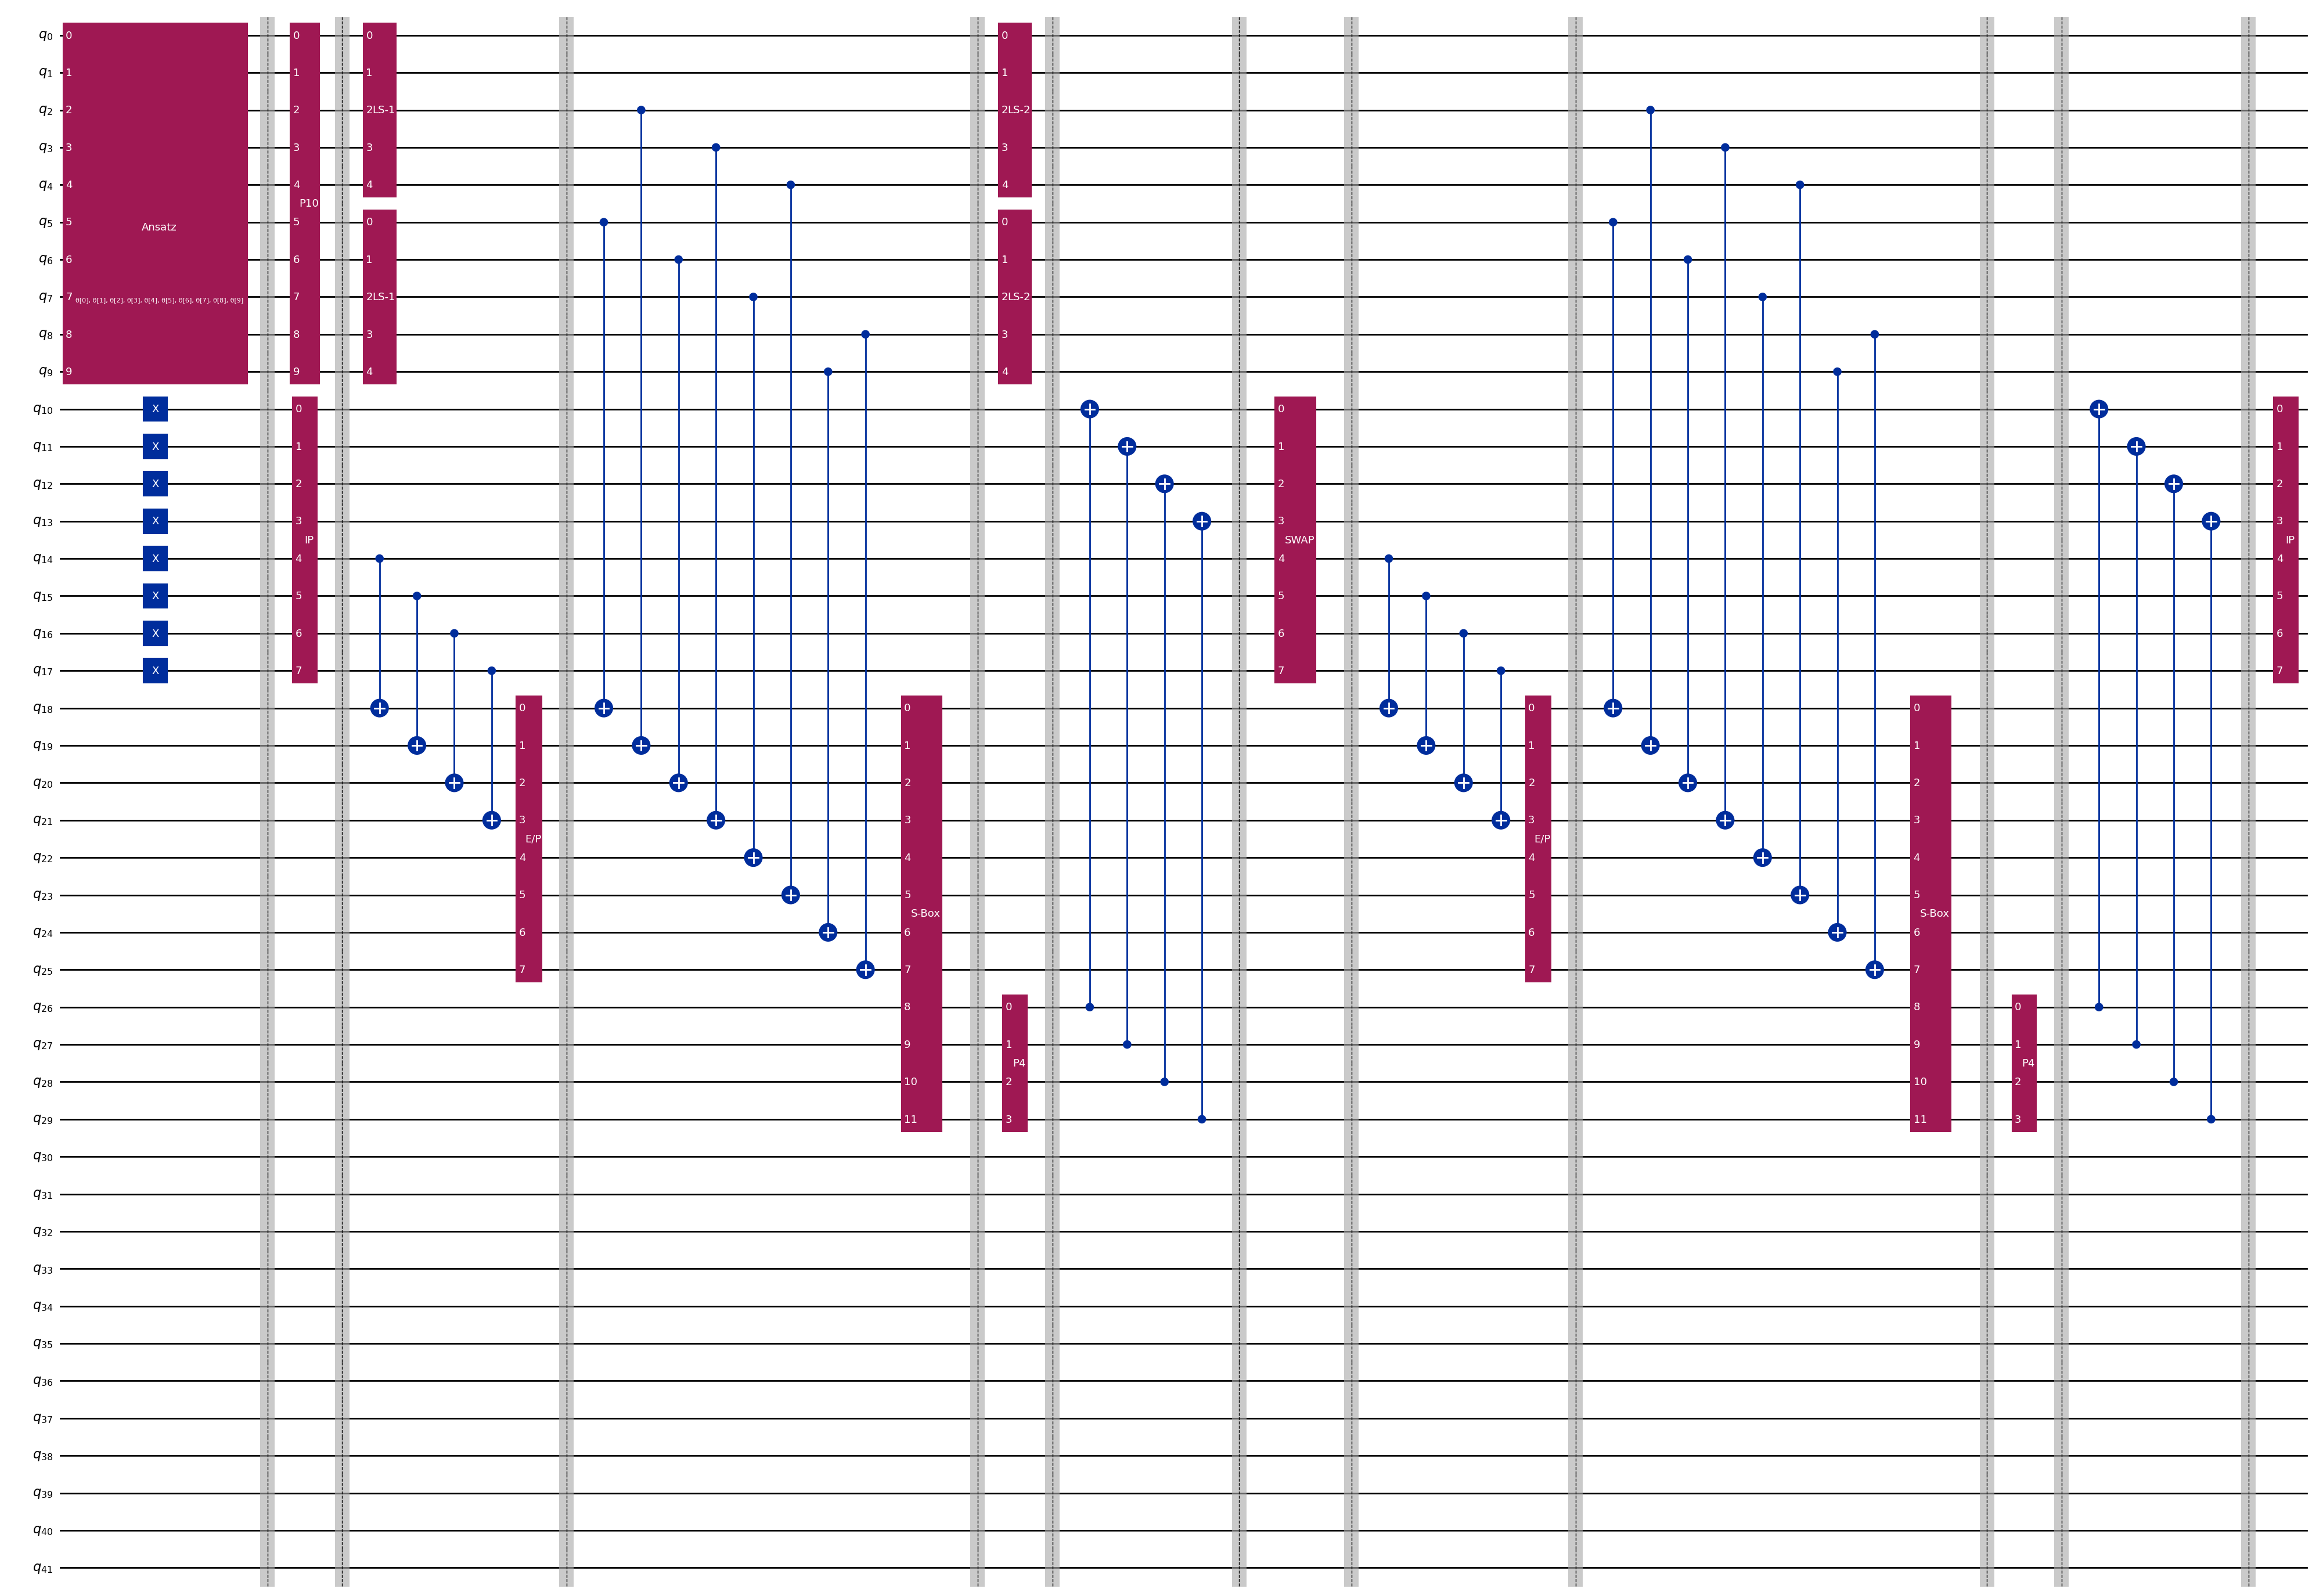

In [39]:
plaintext = "11111111"  # 8-bit plaintext example

key_size = 10 # key

params = []
for i in range(key_size):
    params.append(i * 30)
    
p = len(plaintext) + 16

qc_final = QuantumCircuit(42)
# qc_final = QuantumCircuit(30)
qc_final.compose(ansatz_gate, range(ansatz_gate.num_qubits), inplace=True)


for i, bit in enumerate(plaintext):
    if bit == '1':
        qc_final.x(key_size + len(plaintext) - i - 1)
        
qc_final.barrier()

# Round - 1 Encryption

qc_final.compose(ip_gate, range(10, 18), inplace=True)
qc_final.compose(p10_gate, range(10), inplace=True)
qc_final.barrier()

qc_final.compose(ls1_gate, range(5), inplace=True)
qc_final.compose(ls1_gate, range(5, 10), inplace=True)

# P-8 Permutation
qc_final.cx([14, 15, 16, 17], [18, 19, 20, 21])
qc_final.compose(ep_gate, range(18, 26), inplace=True)

qc_final.barrier()

params1 = [[5, 10 + 8], [2, 11 + 8], [6, 12 + 8], [3, 13 + 8], [7, 14 + 8], [4, 15 + 8], [9, 16 + 8], [8, 17 + 8]]
qc_copy = copy_circ(params1, qc_final.num_qubits)
qc_final.compose(qc_copy ,inplace=True)

s_box_gate = generate_s_box_gate()
qc_final.compose(s_box_gate, range(18, 30), inplace=True)

qc_final.barrier()

qc_final.compose(ls2_gate, range(5), inplace=True)
qc_final.compose(ls2_gate, range(5, 10), inplace=True)
qc_final.compose( p4_gate, range(26, 30) , inplace=True)

qc_final.barrier()

qc_final.cx(26, 10)
qc_final.cx(27, 11)
qc_final.cx(28, 12)
qc_final.cx(29, 13)

qc_final.barrier()

# Round - 2 encryption 

swap_gate = swap_gates()
qc_final.compose(swap_gate, range(10, 18), inplace=True)

# for i in range(18, 30):
#     qc_final.reset(i)

qc_final.barrier()

# P-8 Permutation
qc_final.cx([14, 15, 16, 17], [18, 19, 20, 21])
qc_final.compose(ep_gate, range(18, 26), inplace=True)

qc_final.barrier()

params1 = [[5, 10 + 8], [2, 11 + 8], [6, 12 + 8], [3, 13 + 8], [7, 14 + 8], [4, 15 + 8], [9, 16 + 8], [8, 17 + 8]]
qc_copy = copy_circ(params1, qc_final.num_qubits)
qc_final.compose(qc_copy ,inplace=True)

s_box_gate = generate_s_box_gate()
qc_final.compose(s_box_gate, range(18, 30), inplace=True)

qc_final.barrier()
qc_final.compose( p4_gate, range(26, 30) , inplace=True)

qc_final.barrier()

qc_final.cx(26, 10)
qc_final.cx(27, 11)
qc_final.cx(28, 12)
qc_final.cx(29, 13)

qc_final.barrier()

qc_final.compose(ip_gate, range(10, 18), inplace=True)

qc_final.draw('mpl', fold=-1)  # To visualize the ansatz


## Final circuit without barriers

###  SYMMETRIC ENCRYPTION CIRCUIT 

In [43]:
def generate_sdes_circuit():
    # qc_final = QuantumCircuit(42)
    qc_final = QuantumCircuit(30)
    # Round - 1 Encryption
    
    qc_final.compose(ip_gate, range(10, 18), inplace=True)
    qc_final.compose(p10_gate, range(10), inplace=True)
    
    qc_final.compose(ls1_gate, range(5), inplace=True)
    qc_final.compose(ls1_gate, range(5, 10), inplace=True)
    
    # P-8 Permutation
    qc_final.cx([14, 15, 16, 17], [18, 19, 20, 21])
    qc_final.compose(ep_gate, range(18, 26), inplace=True)
    
    
    params1 = [[5, 10 + 8], [2, 11 + 8], [6, 12 + 8], [3, 13 + 8], [7, 14 + 8], [4, 15 + 8], [9, 16 + 8], [8, 17 + 8]]
    qc_copy = copy_circ(params1, qc_final.num_qubits)
    qc_final.compose(qc_copy ,inplace=True)
    
    s_box_gate = generate_s_box_gate()
    qc_final.compose(s_box_gate, range(18, 30), inplace=True)
    
    qc_final.compose(ls2_gate, range(5), inplace=True)
    qc_final.compose(ls2_gate, range(5, 10), inplace=True)
    
    qc_final.compose( p4_gate, range(26, 30) , inplace=True)
    
    
    qc_final.cx(26, 10)
    qc_final.cx(27, 11)
    qc_final.cx(28, 12)
    qc_final.cx(29, 13)
    
    
    # Round - 2 encryption 
    
    swap_gate = swap_gates()
    qc_final.compose(swap_gate, range(10, 18), inplace=True)
    
    for i in range(18, 30):
        qc_final.reset(i)
    
    # P-8 Permutation
    qc_final.cx([14, 15, 16, 17], [18, 19, 20, 21])
    qc_final.compose(ep_gate, range(18, 26), inplace=True)
    
    params1 = [[5, 10 + 8], [2, 11 + 8], [6, 12 + 8], [3, 13 + 8], [7, 14 + 8], [4, 15 + 8], [9, 16 + 8], [8, 17 + 8]]
    qc_copy = copy_circ(params1, qc_final.num_qubits)
    qc_final.compose(qc_copy ,inplace=True)
    
    s_box_gate = generate_s_box_gate()
    qc_final.compose(s_box_gate, range(18, 30), inplace=True)
    
    qc_final.compose( p4_gate, range(26, 30) , inplace=True)
    
    
    qc_final.cx(26, 10)
    qc_final.cx(27, 11)
    qc_final.cx(28, 12)
    qc_final.cx(29, 13)
    
    qc_final.compose(ip_gate, range(10, 18), inplace=True)
    
    qc_final.draw('mpl', fold=-1)
    return qc_final
    
sdes_circuit = generate_sdes_circuit()

In [ ]:
# qc_sample_final = QuantumCircuit(42, 8)

# key_size = 10 # key

# params = []
# for i in range(key_size):
#     params.append(i * 30)


# qc_sample_final.compose(ansatz_gate, range(ansatz_gate.num_qubits), inplace=True)


# plaintext = "01010101"  # 8-bit plaintext example

# for i, bit in enumerate(plaintext):
#     if bit == '1':
#         qc_sample_final.x(key_size + len(plaintext) - i - 1)

# symmetric_cryptography_gate = qc_final.to_gate(label='S-DES')
# qc_sample_final.compose(symmetric_cryptography_gate, range(0, 42), inplace=True)
# qc_sample_final.measure(range(10, 18), range(8))
# qc_sample_final.draw('mpl')

### Final Circuit + sample plaintext


In [ ]:
# qc_sample_final = QuantumCircuit(42, 8)

# key_size = 10 # key

# params = []
# for i in range(key_size):
#     params.append(i * 30)


# qc_sample_final.compose(ansatz_gate, range(ansatz_gate.num_qubits), inplace=True)


# plaintext = "01010101"  # 8-bit plaintext example

# for i, bit in enumerate(plaintext):
#     if bit == '1':
#         qc_sample_final.x(key_size + len(plaintext) - i - 1)

# symmetric_cryptography_gate = qc_final.to_gate(label='S-DES')
# qc_sample_final.compose(symmetric_cryptography_gate, range(0, 42), inplace=True)
# qc_sample_final.measure(range(10, 18), range(8))

# qc_sample_final.draw('mpl')

# Sample evolution

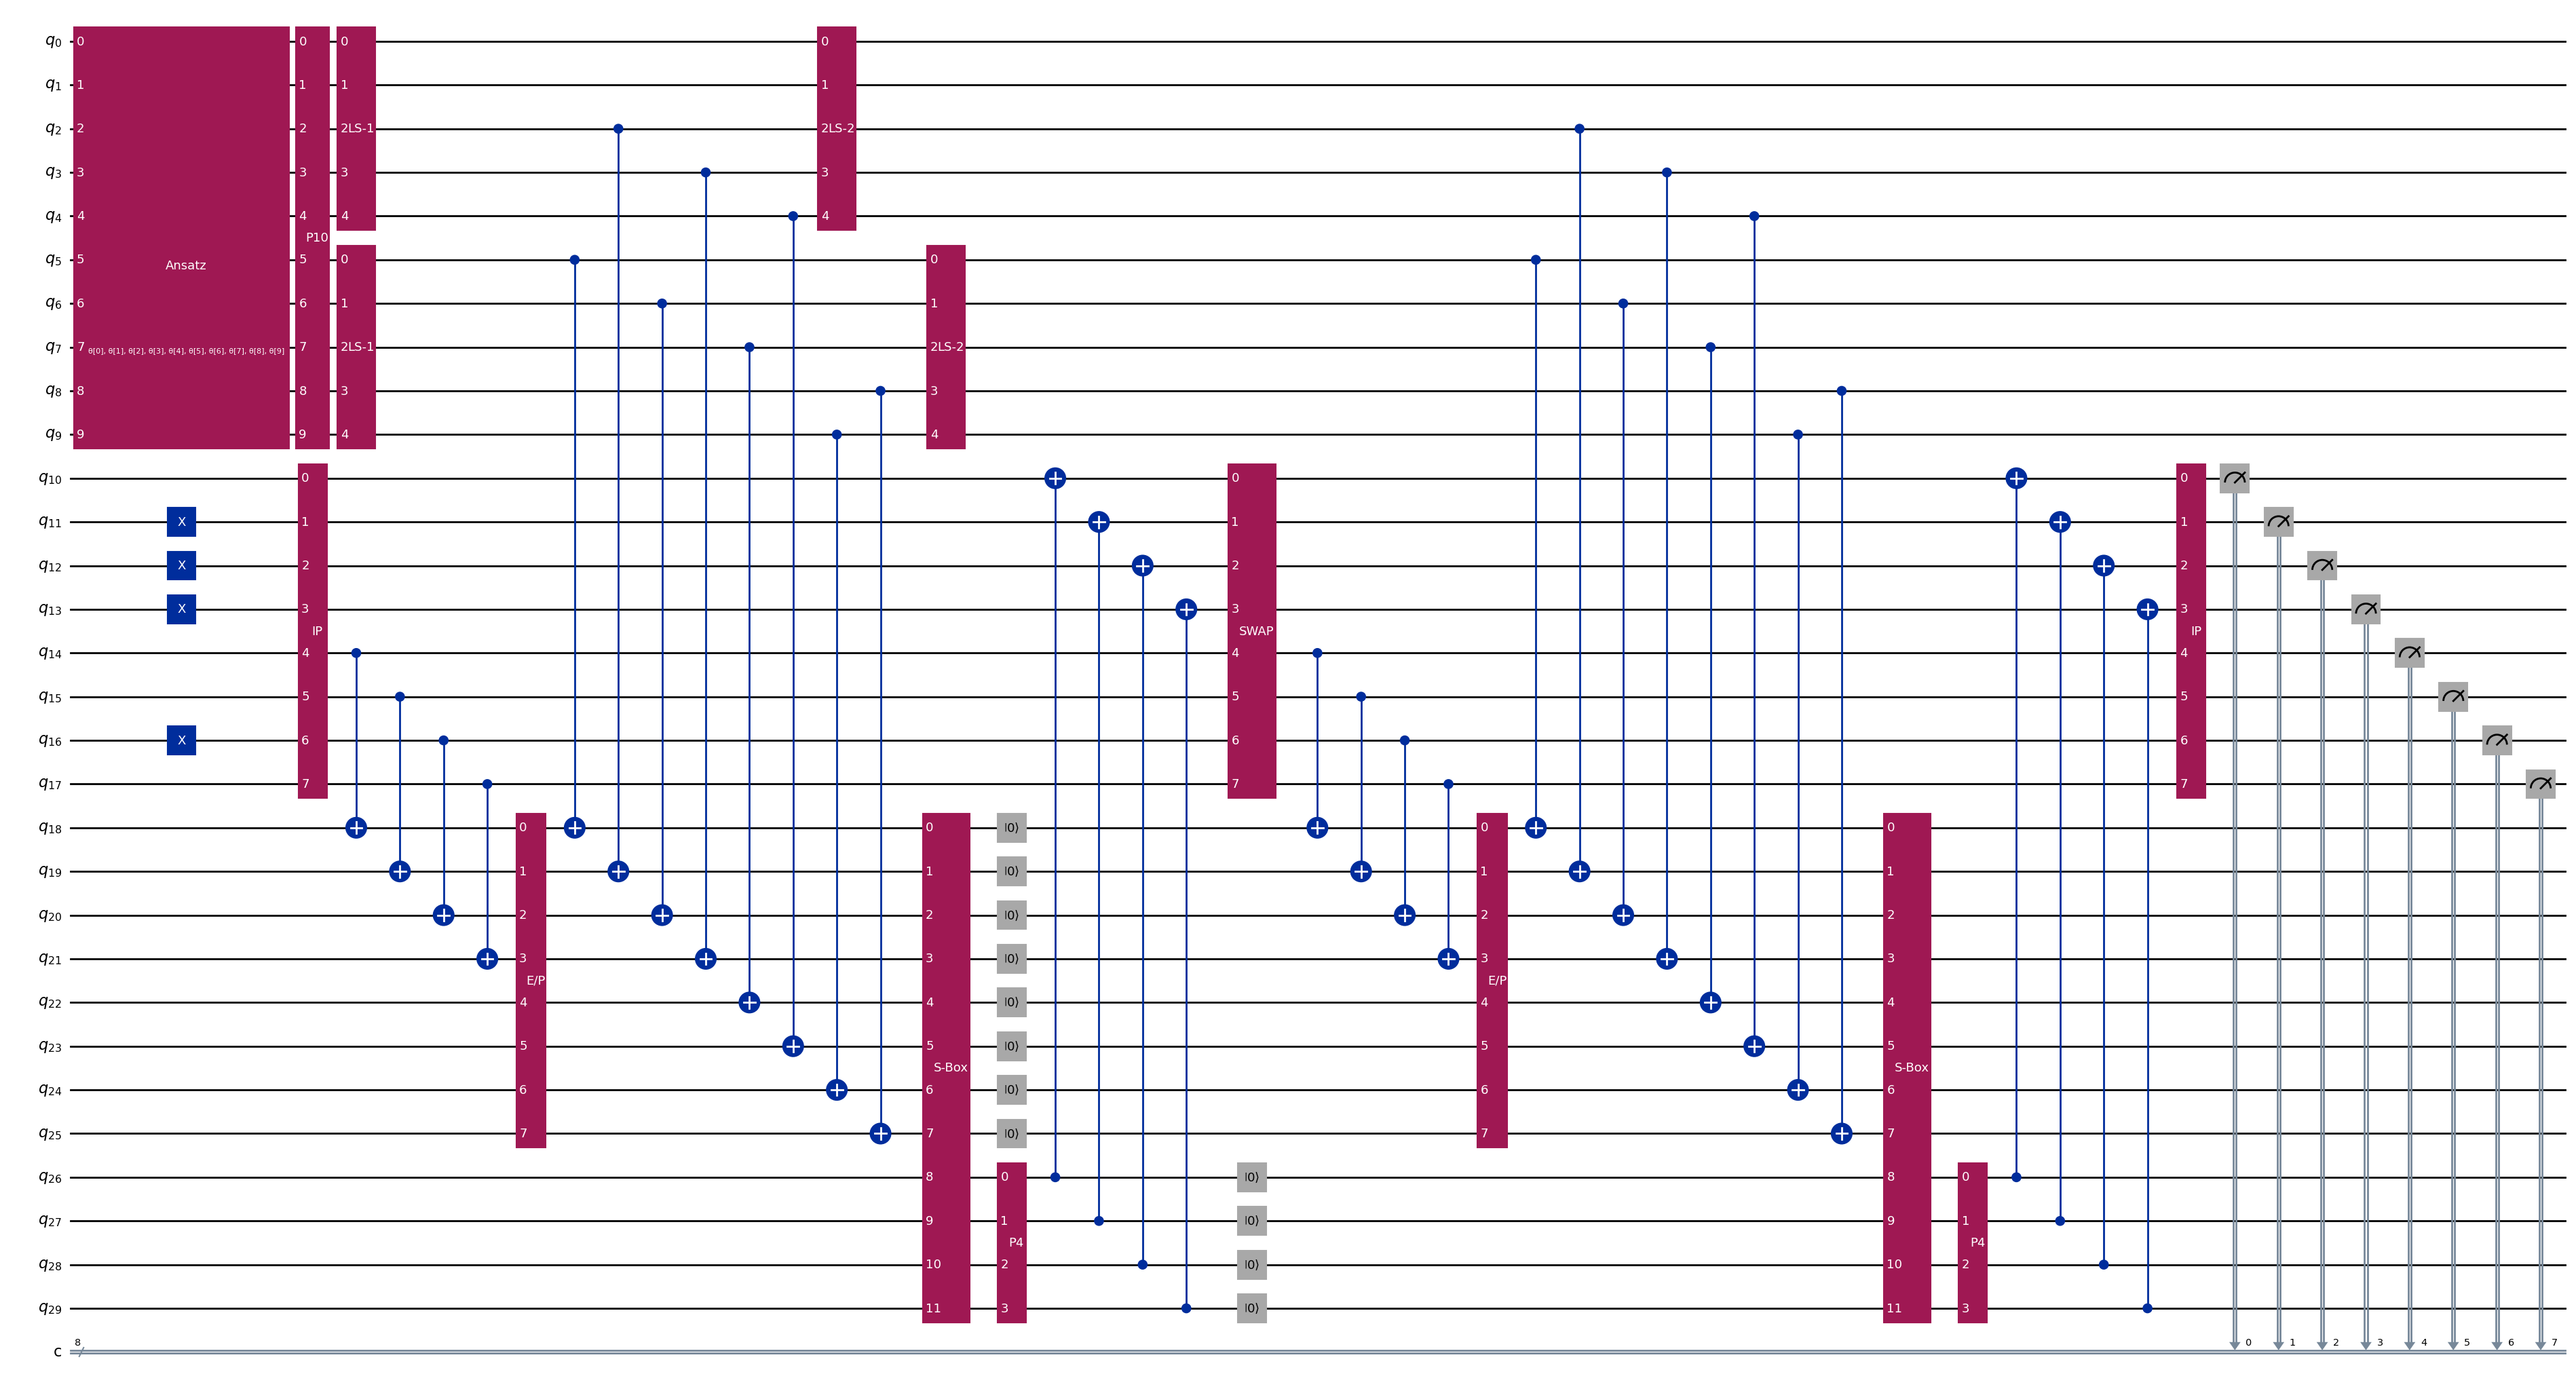

In [47]:
qc_sample =  QuantumCircuit(30, 8)
plaintext = "01001110"
plaintext = plaintext[::-1]

for i, bit in enumerate(plaintext):
    if bit == '1':
        qc_sample.x(10 + i)

qc_sample.compose(ansatz_gate, range(ansatz_gate.num_qubits), inplace=True)
# key = "1010000010"
# for i, bit in enumerate(key):
#     if bit == '1':
#         qc_sample.x(i)


qc_sample.compose(sdes_circuit, inplace=True)
qc_sample.measure(range(10, 18), range(8))
qc_sample.draw('mpl', fold=-1)

In [ ]:
# backend = AerSimulator(method='matrix_product_state')
# transpiled_qc = transpile(qc_sample, backend)

# sampler = Sampler(mode=backend)

# initial_params = []
# for i in range(10):
#     initial_params.append(i * 30)

# job = sampler.run(([transpiled_qc, initial_params]))

# result = job.result()
# bit_array = result._pub_results[0].data.c
# counts = bit_array.get_counts()
# counts

In [48]:
qc_sample.parameters

ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9])])

In [49]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# To run on hardware, select the backend with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

ansatz_isa = pm.run(qc_sample)

In [51]:
ansatz_isa.draw(output="mpl", idle_wires=False, style="iqp")

hamiltonian_isa = hamiltonian_operator.apply_layout(layout=ansatz_isa.layout)

In [83]:
def cost_func(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance
        cost_history_dict: Dictionary for storing intermediate results

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]

    cost_history_dict["iters"] += 1
    cost_history_dict["prev_vector"] = params
    cost_history_dict["cost_history"].append(energy)
    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy}]")

    return energy

cost_history_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}


init_params = 2 * np.pi * np.random.random(10)
print(init_params)

with Session(backend=backend) as session:
    estimator = Estimator(mode=session)
    estimator.options.default_shots = 10000

    res = minimize(
        cost_func,
        init_params,
        args=(ansatz_isa, hamiltonian_isa, estimator),
        method="cobyla",
    )

[3.1573761  0.449916   1.89494963 2.46199802 2.77414565 0.46526507
 2.76256464 5.34688866 2.76414873 4.90505171]
Iters. done: 1 [Current cost: -5.9289706021365856]
Iters. done: 2 [Current cost: -5.887422042285329]
Iters. done: 3 [Current cost: -5.722081539874492]
Iters. done: 4 [Current cost: -6.051303627630768]


IBMRuntimeError: 'Failed to run program: \'400 Client Error: Bad Request for url: https://api.quantum.ibm.com/runtime/jobs. {"errors":[{"code":1217,"message":"Session has been closed.","solution":"Reduce time between submitting subsequent jobs in a session.","more_info":"https://docs.quantum-computing.ibm.com/errors"}]}\''

In [97]:
new_params = cost_history_dict['prev_vector']
new_params

array([3.1573761 , 0.449916  , 2.89494963, 2.46199802, 2.77414565,
       0.46526507, 2.76256464, 5.34688866, 2.76414873, 4.90505171])

θ, ['θ[0]', 'θ[1]', 'θ[2]', 'θ[3]', 'θ[4]', 'θ[5]', 'θ[6]', 'θ[7]', 'θ[8]', 'θ[9]']
ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9])])


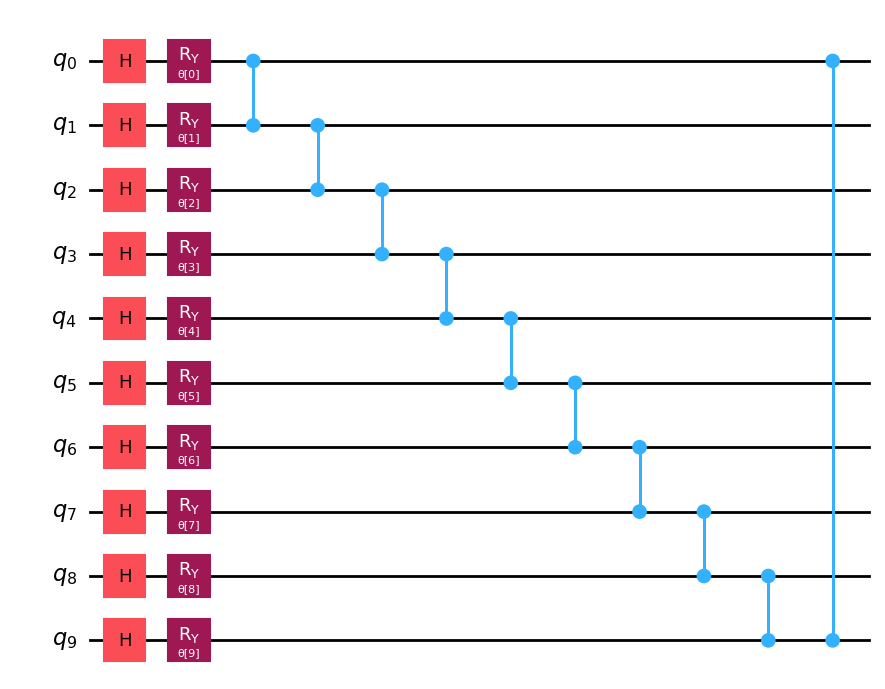

In [87]:
new_ansatz_gate = generate_ansatz_gate(new_params)

In [89]:
new_params = new_params.tolist()

In [91]:
sample_qc = QuantumCircuit(10, 10)
sample_qc.compose(new_ansatz_gate, inplace=True)
sample_qc.measure(range(10), range(10))

sample_backend = AerSimulator(method='matrix_product_state')
sample_transpiled_qc = transpile(sample_qc, sample_backend)

sampler = Sampler(mode=sample_backend)

job = sampler.run([(sample_transpiled_qc, new_params)])

result = job.result()
bit_array = result._pub_results[0].data.c
counts = bit_array.get_counts()
counts

{'0000111010': 5,
 '0101101001': 5,
 '0000111111': 8,
 '0100111011': 9,
 '0001111010': 12,
 '0101111001': 5,
 '0101111110': 31,
 '0001111011': 19,
 '0001011111': 6,
 '0001111000': 6,
 '0101111111': 46,
 '0101001010': 5,
 '0000010010': 1,
 '0101110100': 4,
 '0101110110': 13,
 '0101001111': 4,
 '0101111000': 13,
 '0001111111': 23,
 '0111101110': 2,
 '0110111111': 2,
 '0000101111': 8,
 '0101111011': 24,
 '0100110011': 2,
 '0011110100': 1,
 '0100111100': 9,
 '0101101110': 23,
 '0100001011': 3,
 '0101101101': 9,
 '0100011000': 5,
 '0100101010': 2,
 '0100011110': 8,
 '0101111101': 21,
 '0001101010': 5,
 '0100100110': 4,
 '0101011000': 2,
 '0101000111': 2,
 '0000111011': 8,
 '0101011001': 4,
 '0101001101': 8,
 '0000111100': 3,
 '0100101110': 7,
 '0001110111': 4,
 '0010111110': 1,
 '0100101001': 2,
 '0001101011': 9,
 '0100001111': 4,
 '0100001110': 3,
 '0111101010': 3,
 '0101111100': 19,
 '0001011110': 4,
 '0000010110': 3,
 '0001101110': 8,
 '0101001001': 3,
 '0001111110': 27,
 '0101111010': 2

In [93]:
def max_param_key(counts):
    max_key = "0000000000"
    max_count = 0

    for i in counts:
        if(counts[i] > max_count):
            max_key = i
            max_count = counts[i]

    return {max_key : max_count}

print(max_param_key(counts))

{'0101111111': 46}


# Testing

In [ ]:
def generate_test_circuit():
    # qc_final = QuantumCircuit(42)
    qc_final = QuantumCircuit(30, 8)
    # Round - 1 Encryption
    plaintext = "01110010"
    key = "1010000010"

    for i, bit in enumerate(plaintext):
        if bit=='1':
            qc_final.x(10 + i)
    for i, bit in enumerate(key):
        if bit=='1':
            qc_final.x(i)
    
    qc_final.compose(ip_gate, range(10, 18), inplace=True)
    qc_final.compose(p10_gate, range(10), inplace=True)
    
    qc_final.compose(ls1_gate, range(5), inplace=True)
    qc_final.compose(ls1_gate, range(5, 10), inplace=True)
    
    # P-8 Permutation
    qc_final.cx([14, 15, 16, 17], [18, 19, 20, 21])
    qc_final.compose(ep_gate, range(18, 26), inplace=True)
    
    
    params1 = [[5, 10 + 8], [2, 11 + 8], [6, 12 + 8], [3, 13 + 8], [7, 14 + 8], [4, 15 + 8], [9, 16 + 8], [8, 17 + 8]]
    qc_copy = copy_circ(params1, qc_final.num_qubits)
    qc_final.compose(qc_copy ,inplace=True)
    
    s_box_gate = generate_s_box_gate()
    qc_final.compose(s_box_gate, range(18, 30), inplace=True)
    
    qc_final.compose(ls2_gate, range(5), inplace=True)
    qc_final.compose(ls2_gate, range(5, 10), inplace=True)
    
    qc_final.compose( p4_gate, range(26, 30) , inplace=True)
    
    
    qc_final.cx(26, 10)
    qc_final.cx(27, 11)
    qc_final.cx(28, 12)
    qc_final.cx(29, 13)
    
    
    # Round - 2 encryption 
    
    swap_gate = swap_gates()
    qc_final.compose(swap_gate, range(10, 18), inplace=True)

    qc_final.barrier()
    
    for i in range(18, 30):
        qc_final.reset(i)
    
    # P-8 Permutation
    qc_final.cx([14, 15, 16, 17], [18, 19, 20, 21])
    qc_final.compose(ep_gate, range(18, 26), inplace=True)
    
    params1 = [[5, 10 + 8], [2, 11 + 8], [6, 12 + 8], [3, 13 + 8], [7, 14 + 8], [4, 15 + 8], [9, 16 + 8], [8, 17 + 8]]
    qc_copy = copy_circ(params1, qc_final.num_qubits)
    qc_final.compose(qc_copy ,inplace=True)
    
    s_box_gate = generate_s_box_gate()
    qc_final.compose(s_box_gate, range(18, 30), inplace=True)
    
    qc_final.compose( p4_gate, range(26, 30) , inplace=True)
    
    
    qc_final.cx(26, 10)
    qc_final.cx(27, 11)
    qc_final.cx(28, 12)
    qc_final.cx(29, 13)
    
    qc_final.compose(ip_inv_gate, range(10, 18), inplace=True)
    qc_final.barrier()
    qc_final.measure(range(10, 18), range(8))
    return qc_final
    
test_circuit = generate_test_circuit()

test_circuit.draw('mpl', fold=-1)

In [ ]:
backend = AerSimulator(method='matrix_product_state')
transpiled_qc = transpile(test_circuit, backend)

sampler = Sampler(mode=backend)
job = sampler.run([transpiled_qc])

result = job.result()
bit_array = result._pub_results[0].data.c
counts = bit_array.get_counts()
counts

# Backend 